## Project:Medical Representative

Medical representatives are the key point of contact between
pharmaceutical and medical companies and healthcare professionals.
A medical representative's job is to promote and sell their company's
products, whether that's pharmaceutical drugs or medical equipment.
Customers can include doctors, nurses and pharmacists. The medical
representative will increase product awareness, answer queries,
company.

The job of medical representative has a lot of challenges but the most
important one is how the medical representative convinces a doctor to write a
drug from the medical company which he works for in his prescription where
there are many competitors' drugs that have the same active ingredient from
other companies.
The goal is to know if a doctor with some
specific features will write or not one of 6 drugs for a medical
company that has license to produce several types of local produced
drugs with the same active ingredients of multinational original drugs.

## Exploring the Data
In this part i'm going to explore the data and all the features.

### Datasets and Inputs
The dataset was collected by me in a year from private clinics,
hospitals and pharmacies
All data are public data that was collected from doctors and
pharmacists about 6 drugs produced by a certain medical company.


# First Stage: Data Collection

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display     # Allows the use of display() for DataFrames
import sqlite3
import seaborn as sb
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline
%load_ext sql

con = sqlite3.connect("med.db")
cur = con.cursor()
%sql sqlite:///med.db

## Featureset Exploration
### Input Data fields (Features and Labels)
The input data consists of 390 samples collected from 253 doctors.
This data will be used for training and validation test in a data base file
named 'med' attached with the project proposal.
the data in database called med and splited in two tables connected by the id column.
#### table 1 : medicine_table
* **id_m:** row id for every medicine
* **medicine:** The commercial name of the medicine that I refer to it as type1 to type6.
* **Price:** price for every drug of these 6 drugs for patient.

#### table 2 : doctor_table
* **id_dr:** row id for every doctor
* **exam_price:** examination price that the doctor takes from the patient.
* **clinic_hos:** classification if this doctor has a private 'clinic' or works in a 'hospital'.
* **dr_class:** doctor class was classified according to number of patients for every doctor and how much is this doctor famous and it was classified to 'a' and 'b'.

**where:**

* **class a:** are doctors with high patient rate
* **class b:** are doctors with medium patient rate
* **area:** every medical representative cover some areas in a city where the medical representative has to make a lot of visits for alot of doctors in different places and I refer to each area with the name (area1 to area8)with total 8 areas that I have covered to make my prospection.
* **specialty:** the specialty of the doctor is one of the most important features because it will determine which of the 6 drugs will be suitable for this doctor to write it in his prescription. 

**These specialties are:**
* **Chest:** chest specialist
* **Im:** internal medicine specialist
* **Cd:** cardiology specialist
* **Neuro:** neurology specialist
* **Git:** gastrointestinal tract specialist
* **Ent:** ear, nose and throat specialist
* **Sur:** surgery specialist
* **Uro:** urology specialist
* **Gp:** general practitioner
* **Or:** orthopedic specialist
* **Vas:** vascular specialst

**With total 11 specialties.**

* **Target (label):** just one target to classify if this doctor write any of these drugs in prescription to his patients or not. With (1) if the doctor writes the drug in his prescription and (0) if not.

In [2]:
medicine_table = %sql SELECT * FROM medicine_table;
medicine_table = medicine_table.DataFrame()
display(medicine_table.head())

 * sqlite:///med.db
Done.


,id_m,medicine,price
0,1,type1,45
1,2,type4,36
2,3,type1,45
3,4,type1,45
4,5,type5,29


In [3]:
doctor_table = %sql SELECT * FROM doctor_table ;
doctor_table = doctor_table.DataFrame()
display(doctor_table.head())

 * sqlite:///med.db
Done.


,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,1,area1,chest,a,200,clinic,1
1,2,area2,im,b,100,clinic,1
2,3,area8,chest,a,75,hospital,1
3,4,area5,chest,a,30,hospital,1
4,5,area6,uro,a,220,clinic,0


In [4]:
data = pd.concat([doctor_table, medicine_table], axis=1, ignore_index=False)
write_col = data.pop('write')
data['write'] = write_col
data.head()

,id_dr,area,speciality,dr_class,exam_price,clinic_hos,id_m,medicine,price,write
0,1,area1,chest,a,200,clinic,1,type1,45,1
1,2,area2,im,b,100,clinic,2,type4,36,1
2,3,area8,chest,a,75,hospital,3,type1,45,1
3,4,area5,chest,a,30,hospital,4,type1,45,1
4,5,area6,uro,a,220,clinic,5,type5,29,0


## Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of doctors who wrote any of the 6 drugs in their prescription. In the code cell below, i will compute the following:

The total number of records, 'n_records'

The number of doctors who wrote any of the 6 drugs in their prescription, 'n_doctor_who_write'.

The number of doctors who didn't write any of the 6 drugs in their prescription, 'n_doctor_who_not_write'.

The percentage of doctors who wrote any of the 6 drugs in their prescription, 'write_percent'.

# Second Stage: Data Exploration

In [5]:
data.describe()

,id_dr,exam_price,id_m,price,write
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,121.205128,195.500000,35.715385,0.587179
std,112.727548,86.729844,112.727548,8.751263,0.492974
min,1.000000,30.000000,1.000000,20.000000,0.000000
25%,98.250000,50.000000,98.250000,29.000000,0.000000
50%,195.500000,80.000000,195.500000,36.000000,1.000000
75%,292.750000,170.000000,292.750000,45.000000,1.000000
max,390.000000,350.000000,390.000000,45.000000,1.000000


### Summary Statistics Interpretation

- **Price**: 
  - Average price: **35.72** (range: **20** to **45**). Prices vary moderately (std: **8.75**) with no extreme values.

- **Examination Price (`exam_price`)**: 
  - Average exam price: **121.21** (range: **30** to **350**), with significant variation (std: **86.73**).

- **Prescription Writing (`write`)**: 
  - Average writing rate: **59%** of doctors prescribe medicines. Most doctors (at least 50%) write prescriptions, with a binary outcome (0 or 1).
  
- **Medicine**: 
  - Total unique medicines: **6**. The most frequently prescribed medicine is **type1** (frequency: **157**).

- **Area**: 
  - Total unique areas: **8**. The most common area is **area2** (frequency: **80**).

- **Speciality**: 
  - Total unique specialities: **11**. The most represented speciality is **Internal Medicine (IM)** (frequency: **146**).

- **Doctor Class (`dr_class`)**: 
  - Total unique classes: **2**. The most common class is **Class B** (frequency: **224**).

- **Clinic/Hospital (`clinic_hos`)**: 
  - Total unique classifications: **2**. The most prevalent classification is **hospital** (frequency: **197**).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_dr       390 non-null    int64 
 1   area        390 non-null    object
 2   speciality  390 non-null    object
 3   dr_class    390 non-null    object
 4   exam_price  390 non-null    int64 
 5   clinic_hos  390 non-null    object
 6   id_m        390 non-null    int64 
 7   medicine    390 non-null    object
 8   price       390 non-null    int64 
 9   write       390 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 30.6+ KB


In [7]:
print("The total number of records is:", data.shape[0])
print("The number of doctors who wrote any of the 6 drugs in their prescription:", data[data['write']==1].shape[0])
print("The number of doctors who didn't write any of the 6 drugs in their prescription:", data[data['write']==0].shape[0])
print("The percentage of doctors who wrote any of the 6 drugs in their prescription:", (data[data['write']==1].shape[0]/data.shape[0])*100, "%")

The total number of records is: 390
The number of doctors who wrote any of the 6 drugs in their prescription: 229
The number of doctors who didn't write any of the 6 drugs in their prescription: 161
The percentage of doctors who wrote any of the 6 drugs in their prescription: 58.71794871794872 %


# Third Stage: Data Cleaning

### The dataset does not have null values

### Check for duplicated data

In [8]:
data.duplicated().value_counts()

False    390
Name: count, dtype: int64

### The dataset does not have duplicated data

In [9]:
data.drop_duplicates(inplace=True)
data.shape

(390, 10)

### Remove 'id_dr' and 'id_m' columns as they are the same and meaningless for the dataset

In [10]:
data.drop(['id_dr', 'id_m'], axis=1, inplace=True)
data.head()

,area,speciality,dr_class,exam_price,clinic_hos,medicine,price,write
0,area1,chest,a,200,clinic,type1,45,1
1,area2,im,b,100,clinic,type4,36,1
2,area8,chest,a,75,hospital,type1,45,1
3,area5,chest,a,30,hospital,type1,45,1
4,area6,uro,a,220,clinic,type5,29,0


# Fourth Stage: Date Analysis

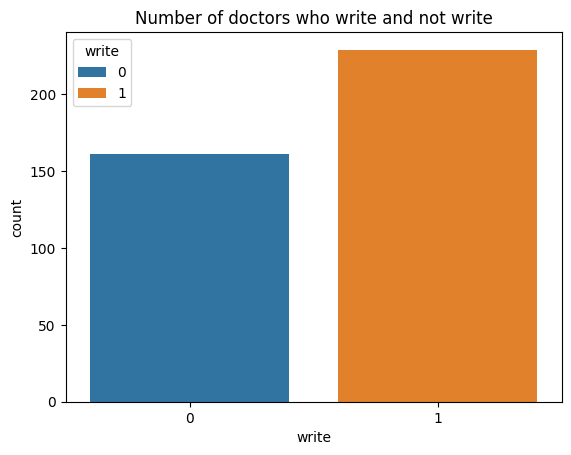

In [11]:
sb.countplot(data=data, x='write',hue='write');
plt.title("Number of doctors who write and not write");

# This graph shows that:
Number of doctors who prescripe the company's medicines for thier patients are more than who do not prescripe.

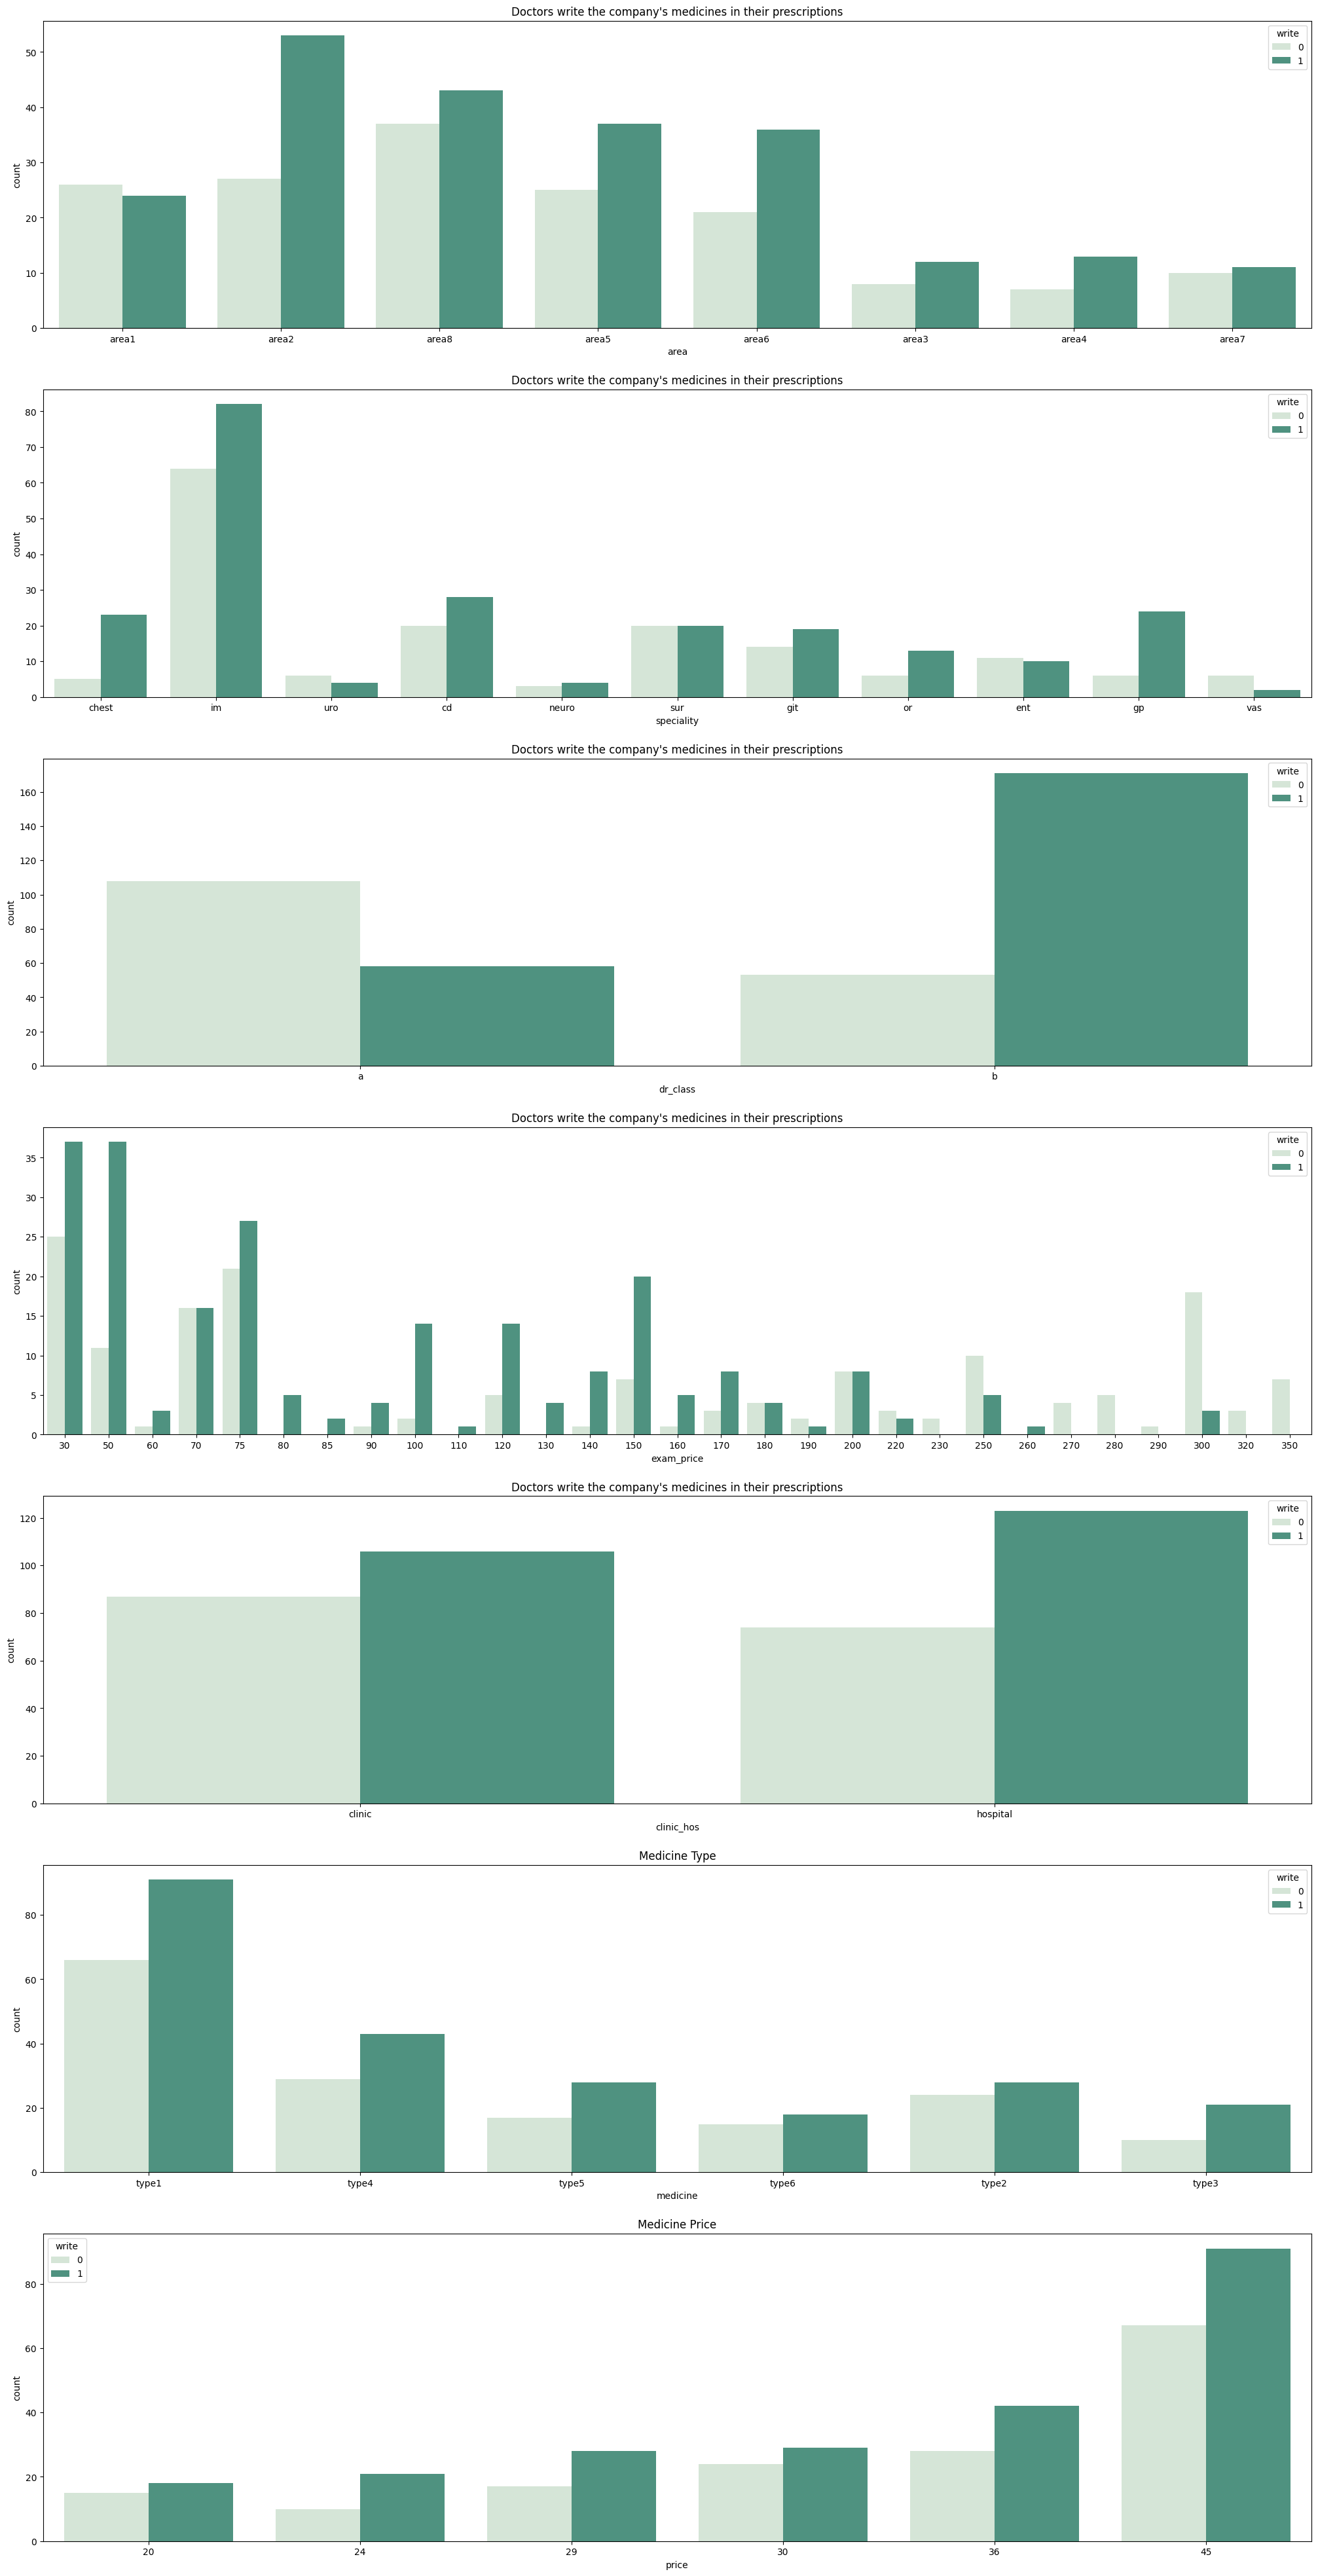

In [12]:
plt.figure(figsize=[25, 50])
doctors_write = data[data['write'] == 1].copy()
for i in range(data.shape[1]-1):
    plt.subplot(data.shape[1] - 1, 1, i+1)
    sb.countplot(data=data, x=data.columns[i],hue='write', palette=['#D2E8D5', '#449D85'])
    plt.xlabel(f"{data.columns[i]}"); plt.ylabel("count")
    if(i == 5):
        plt.title("Medicine Type")
    elif(i == 6):
        plt.title("Medicine Price")
    else:
        plt.title("Doctors write the company's medicines in their prescriptions")

# The previous graphs shows that:
1- Doctors in 'area2' are the most ones who prescribe the company's medicines for their patients, followed by 'area8' then 'area5'.

2- Doctors whose specialization is 'im' (internal medicine specialist) are the most ones who prescribe the company's medicines for their patients.

3- Doctors with class 'b' are the most ones who prescribe the company's medicines for their patients.

4- Doctors whose examination price is '30' or '50' are the most ones who prescribe the company's medicines for their patients, followed by '75'.
 
**which means that doctors with cheapest examination price are the most ones who prescribe the company's medicines for their patients**.

5- Doctors who work at hospitals are little bit more than doctors who work at clinics in prescriping the company's medicines for their patients.

6- Medicine of 'type1' are the most written in the doctors prescriptions for patients.

7- Medicine of price '45' pounds (which is of 'type1') are the most written in the doctors prescriptions for patients.

**Which means that the most expensive medicine between all company's medicine is the most written in the doctors prescriptions for patients**.

<Axes: title={'center': "Statistics about number of doctors who prescripe the company's medicines and area according to doctors specializations"}, xlabel='area', ylabel='count'>

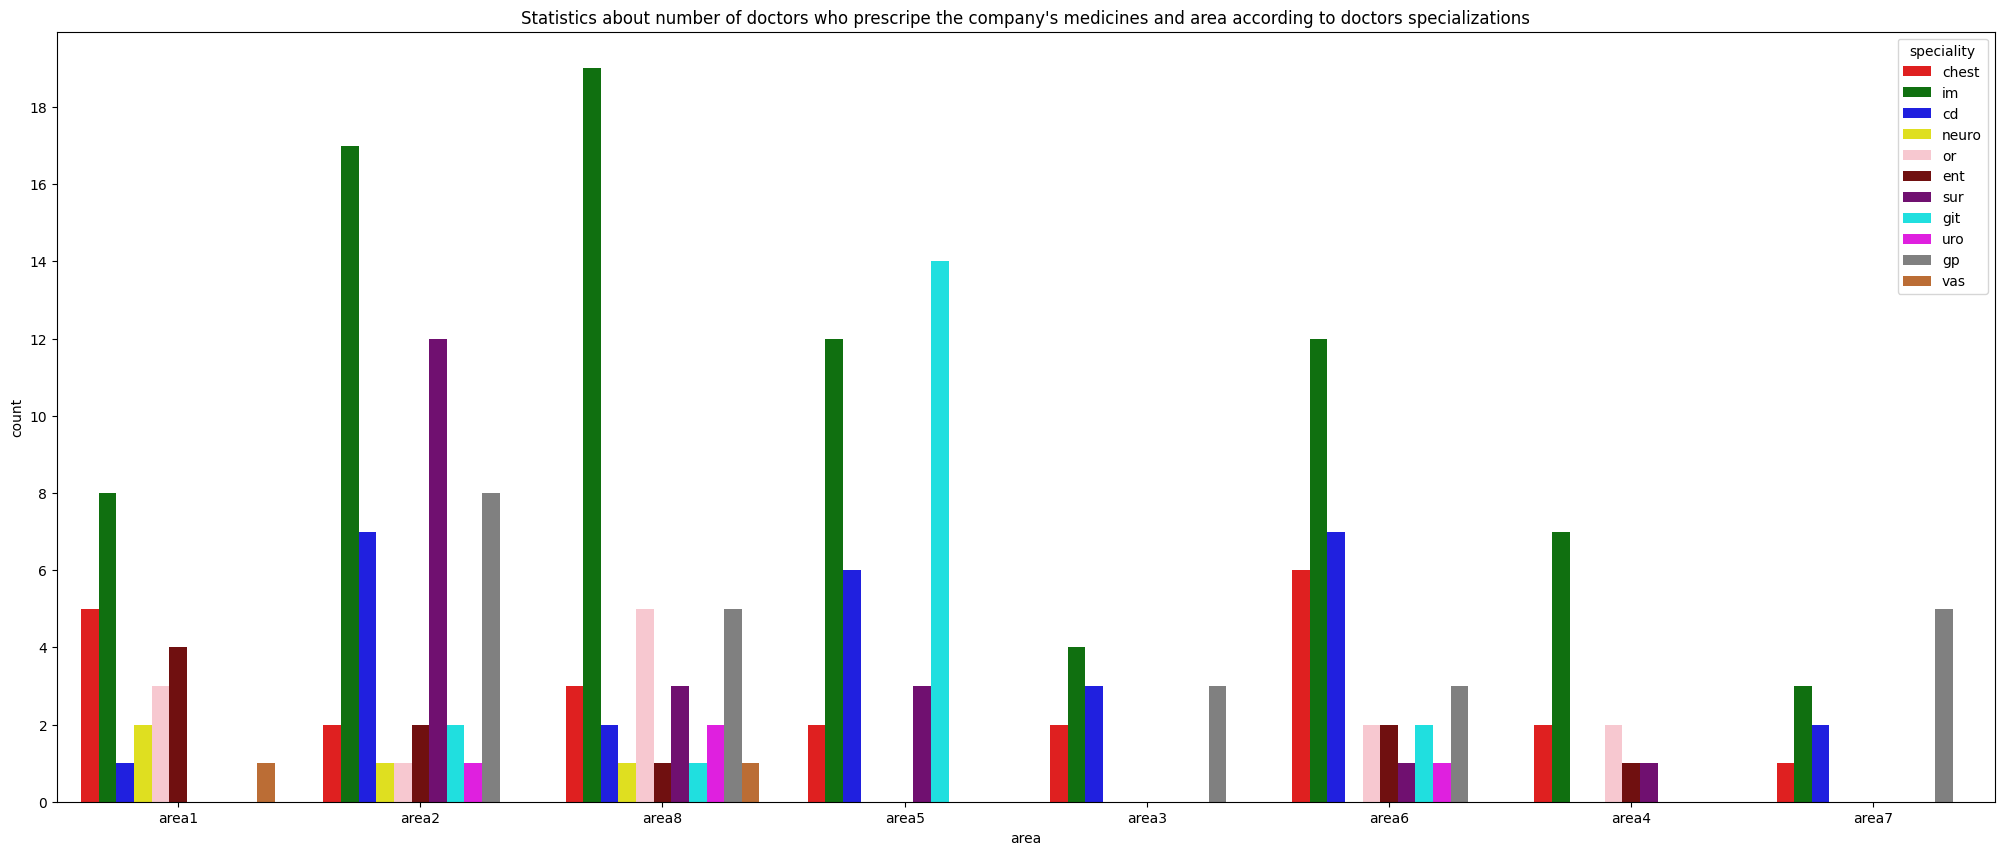

In [13]:
import matplotlib.ticker as ticker
plt.figure(figsize=[25,10])
plt.title("Statistics about number of doctors who prescripe the company's medicines and area according to doctors specializations")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
sb.countplot(data=doctors_write, x='area', hue='speciality', palette=['red', 'green', 'blue', 'yellow', 'pink', 'maroon', 'purple', 'cyan', 'magenta', 'gray', 'chocolate'])

# This graph shows statistics that relate the number of doctors who write company's medicines in each area according to the speciality, and we found that:
1- At 'area1', 'area2', 'area3', 'area4', 'area6', and 'area8', docotrs who are specialists at 'im' are the most ones who write the company's medicines in their prescriptions for their patients.

**Which means that the company's medicines at 'im' (internal medicine specialist) specialization are the most effective between the other medicines**.

2- In 'area5', docotrs who are specialists at 'git' (gastrointestinal tract specialist) are the most ones who write the company's medicines in their prescriptions for their patients.

3- In 'area7', docotrs who are specialists at 'gp' (general practitioner) are the most ones who write the company's medicines in their prescriptions for their patients.

4- Docotrs who are specialists at 'vas' (vascular specialst) are the least ones between doctors who write the company's medicines in their prescriptions for their patients.

**Which means that the company's medicines at 'vas' specialization are not effective enough**.

Text(0.5, 0, 'Medicine Type')

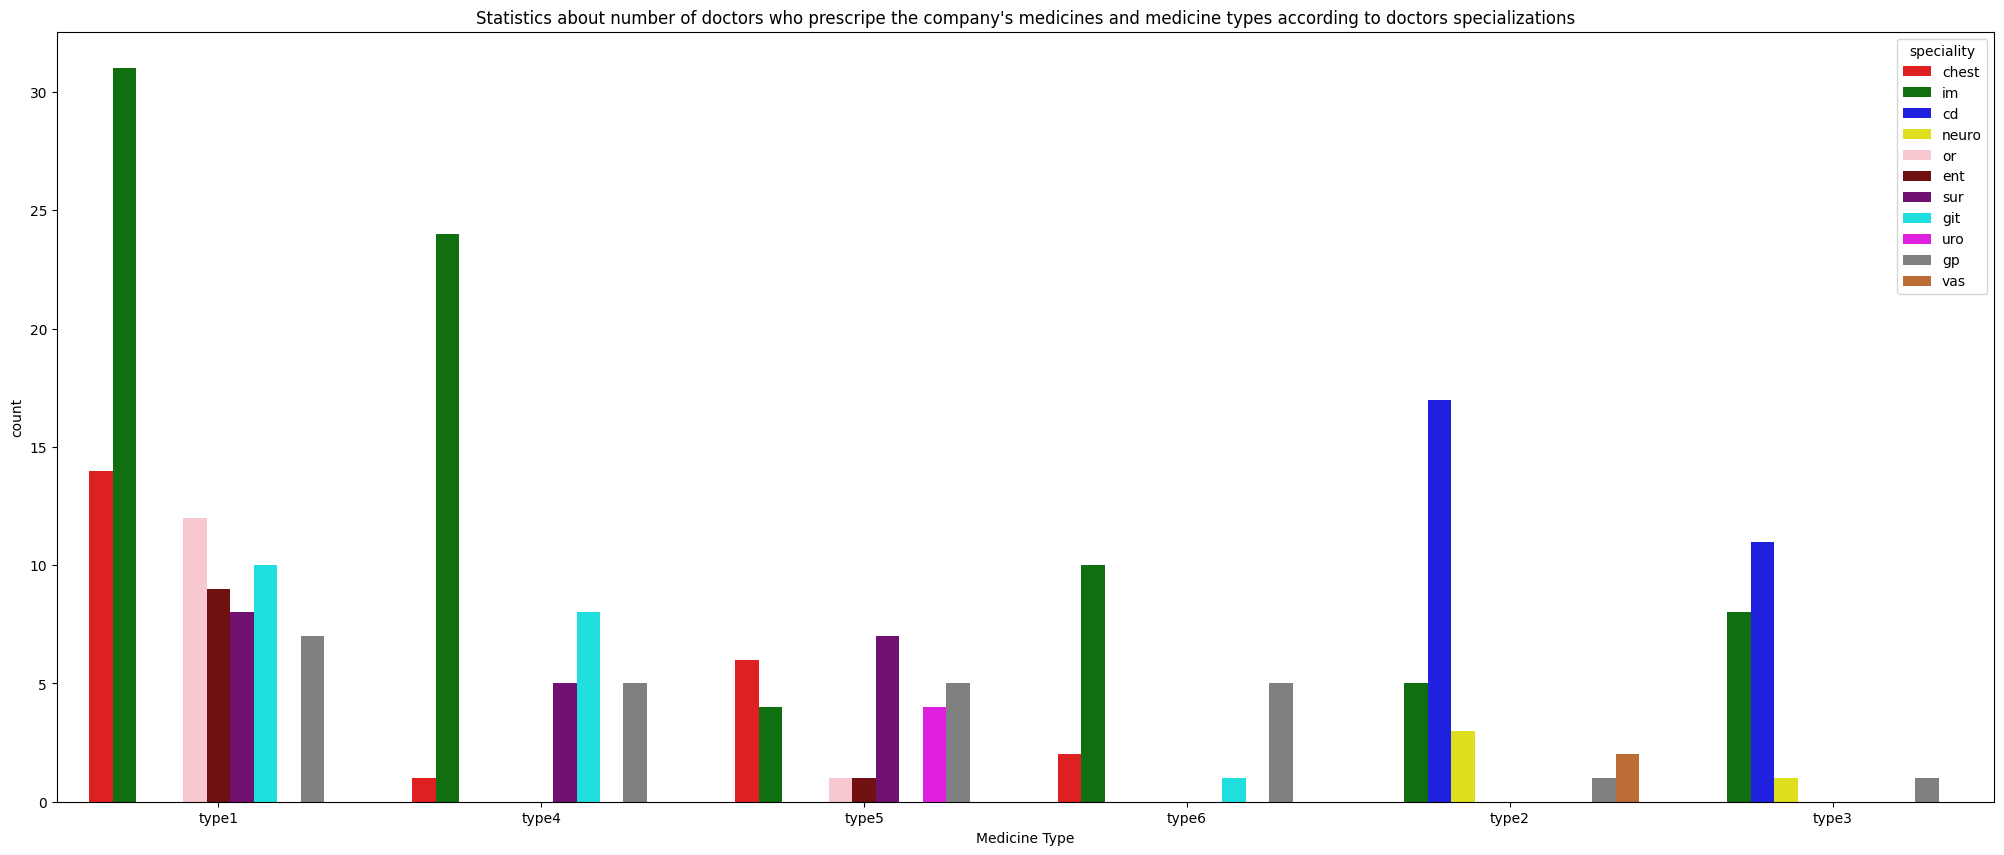

In [14]:
plt.figure(figsize=[25,10])
plt.title("Statistics about number of doctors who prescripe the company's medicines and medicine types according to doctors specializations");
sb.countplot(data=doctors_write, x='medicine', hue='speciality', palette=['red', 'green', 'blue', 'yellow', 'pink', 'maroon', 'purple', 'cyan', 'magenta', 'gray', 'chocolate'])
plt.xlabel("Medicine Type")

# This graphs shows that:
1- Medicines of 'type1', 'type4', and 'type6' are mostly written by doctors who are specialists at 'im' (internal medicine specialist)

**Which means that for this type of medical deseases medicine of 'type1' is the most written by doctors between all the company's medicines**.

2- Medicine of 'type5' is the most written by doctors who are specialists at 'sur' (surgery specialist), followed by 'chest' specialists

3- Medicines of 'type2' and 'type3' are the most written by doctors who are specialists at 'cd' (cardiology specialist), followed by 'im' specialists

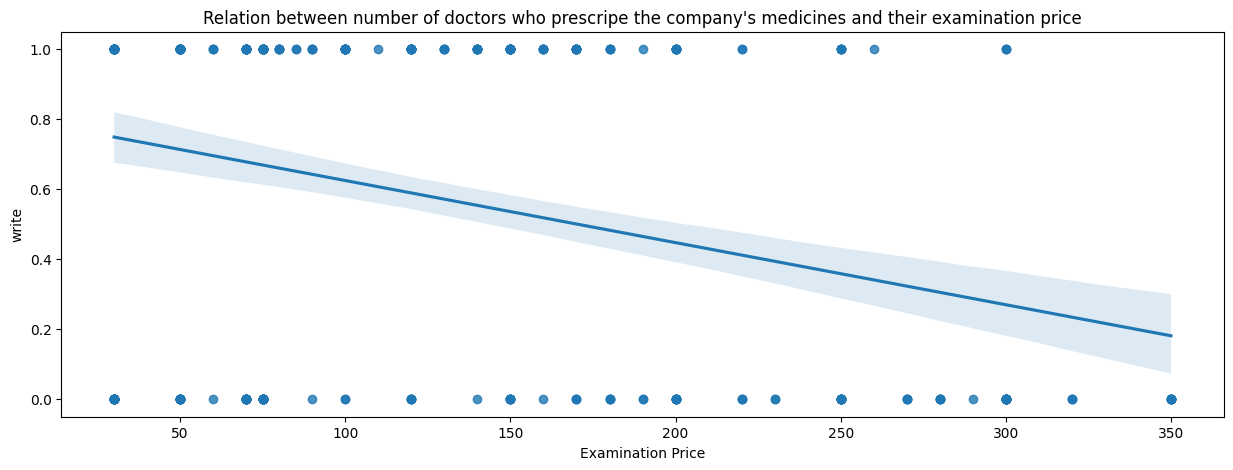

In [15]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=[15,5])
sb.regplot(data=data, x='exam_price', y='write')
plt.title("Relation between number of doctors who prescripe the company's medicines and their examination price");
plt.xlabel("Examination Price");

# This graphs shows the linear relation between number of doctors who prescripe the company's medicines and their examination price, and shows that:
The higher the examination price, the fewer the number of doctors prescriping the company's medicines, as it has a negative slope.

In [16]:
print("Correlation between 'prescriping the medicines' and 'examination price':", data['exam_price'].corr(data['write']))

Correlation between 'prescriping the medicines' and 'examination price': -0.31210961197240983


### The correlation means that this inverse relation is a weak relation

<Axes: title={'center': "Statistics about number of doctors who prescripe the company's medicines and area according to doctors class"}, xlabel='area', ylabel='count'>

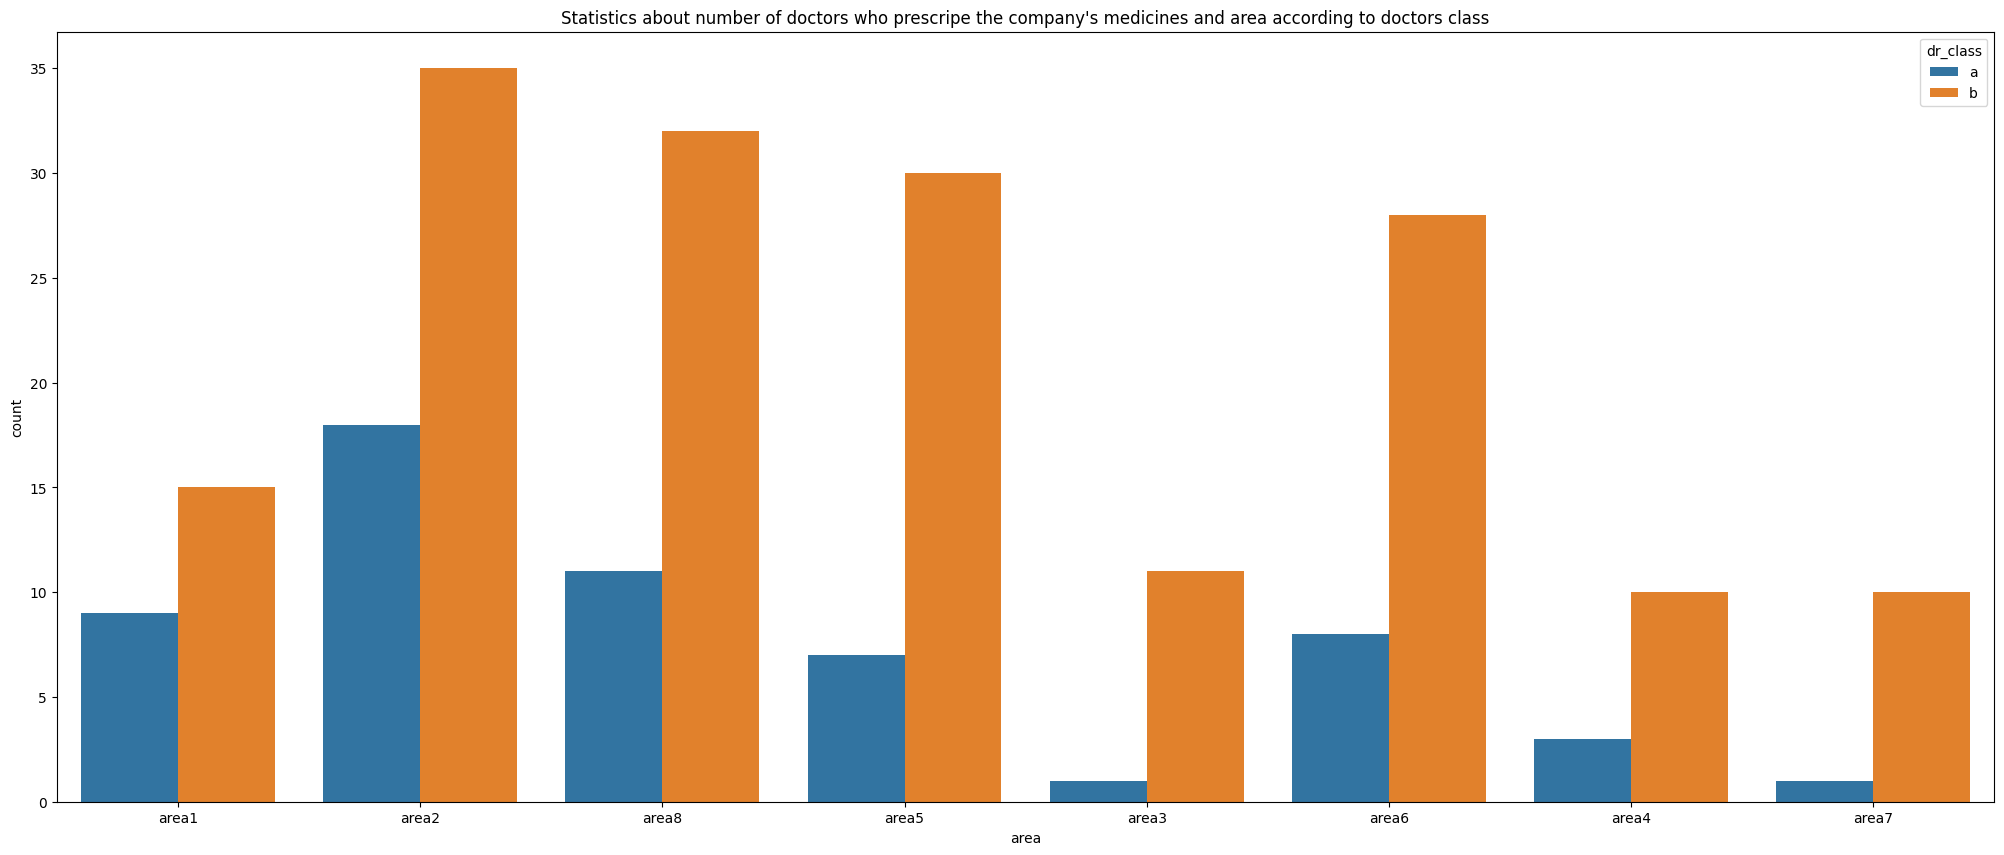

In [17]:
plt.figure(figsize=[25,10])
plt.title("Statistics about number of doctors who prescripe the company's medicines and area according to doctors class")
sb.countplot(data=doctors_write, x='area', hue='dr_class')

### This bar chart shows that doctors of class 'b' are the most ones who prescripe the company's medicines for their patients at all areas
**Which means that young doctos or doctors who are at the beginning of their career are more expected to prescripe the company's medicine than famous or expert doctors**.

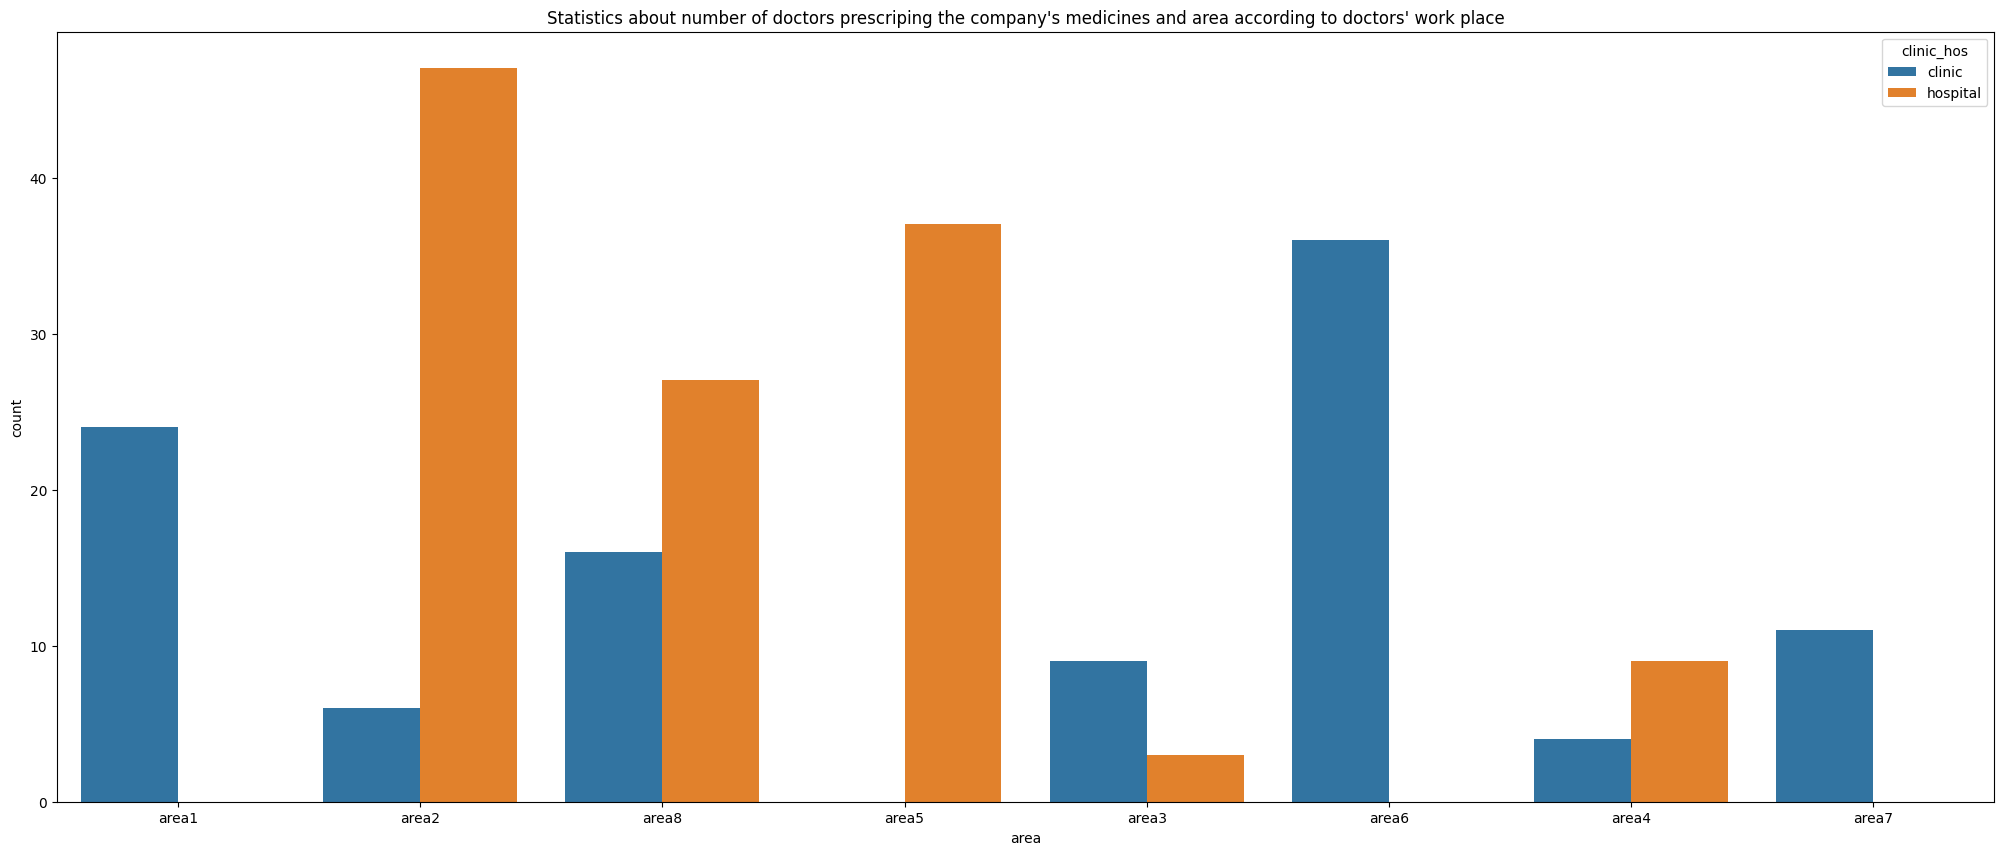

In [18]:
plt.figure(figsize=[25,10])
plt.title("Statistics about number of doctors prescriping the company's medicines and area according to doctors' work place")
sb.countplot(data=doctors_write, x='area', hue='clinic_hos');

# This bar chart shows that:
1- At 'area1', 'area6', 'area7', and 'area6', all the doctors who prescripe the company's medicine for their patients work at clinics, except 'area6' there is a small number of doctors who prescripe the company's medicines.

**Which means that doctors who work at hospital in these 3 areas are not expected to prescripe the medicines**.

2- Doctors at 'area2', 'area4', 'area5', and 'area8' and work at hospitals, are the most ones who prescriping the company's medicine for their patients.

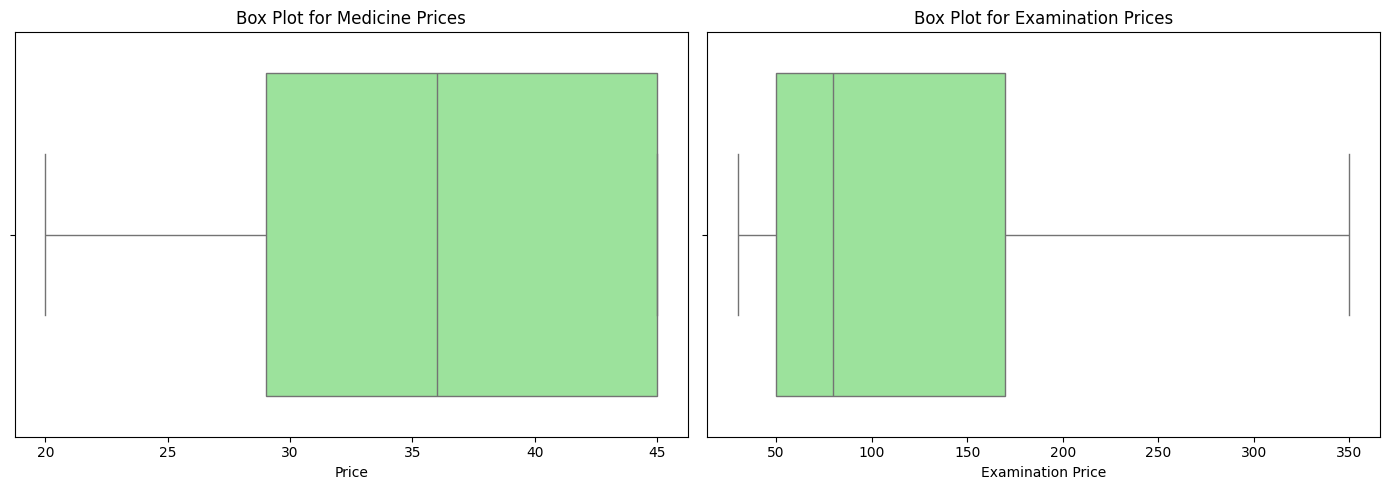

In [19]:
# Create a figure with two subplots side by side
plt.figure(figsize=(14, 5))

# Box plot for price
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sb.boxplot(x=data['price'], color='lightgreen')
plt.title('Box Plot for Medicine Prices')
plt.xlabel('Price')

# Box plot for exam_price
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sb.boxplot(x=data['exam_price'], color='lightgreen')
plt.title('Box Plot for Examination Prices')
plt.xlabel('Examination Price')

# Show the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

### Interpret the box plots
**Price**
- this box plot indicates that the prices of medicine are fairly consistent, with a median around 35 and a range from 20 to 45, without any extreme outliers.

**Examination Price**
- The width of the box indicates the variability in examination prices but overall, this box plot indicates that examination prices have a median around 100, with a range from 50 to 200, and show some variability but no extreme outliers. This suggests a consistent pricing structure for examinations within this dataset

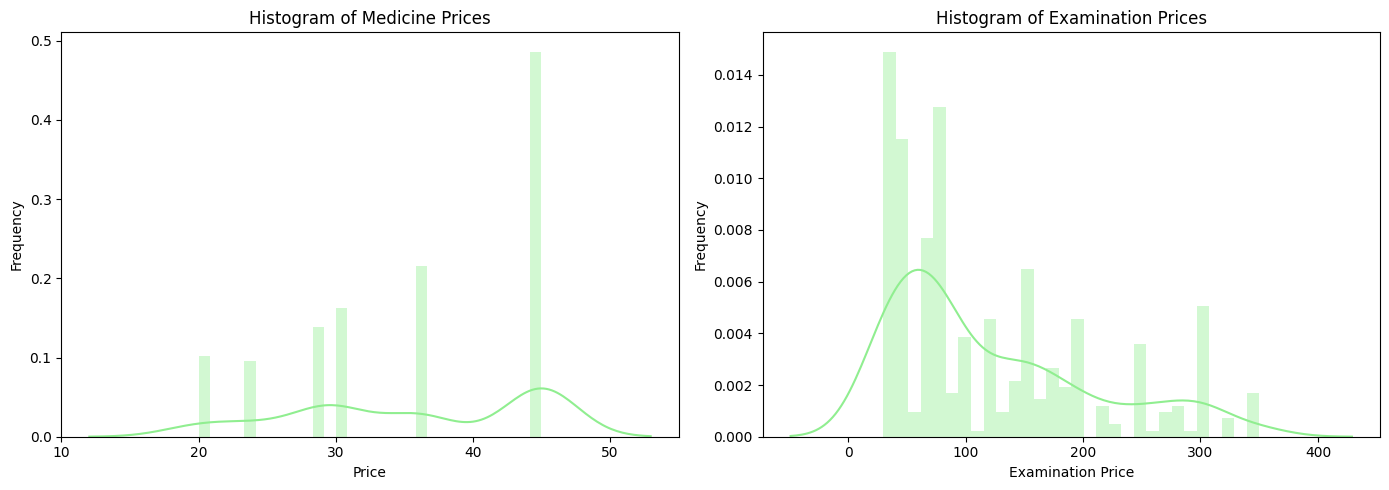

In [20]:
# Create a figure with two subplots side by side
plt.figure(figsize=(14, 5))

# Histogram for price
plt.subplot(1, 2, 1)  
sb.distplot(data['price'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram of Medicine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for exam_price
plt.subplot(1, 2, 2) 
sb.distplot(data['exam_price'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram of Examination Prices')
plt.xlabel('Examination Price')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout() 
plt.show()

In [21]:
import seaborn as sb
print(sb.__version__)

0.13.2


## Scatter Plot of Examination Price vs. Medicine (colored by Doctor Class)

- Show the relationship between price of medicine written in every doctor speciality and his examination price classified by his class

In [22]:
spec = data["speciality"].unique()

In [23]:
import plotly.express as px

for i in range(len(spec)):
    doc_spec = data[(data["speciality"] == spec[i]) & (data["write"] == 1)]
    fig = px.scatter(doc_spec, x='exam_price', y='medicine', color='dr_class')
    
    fig.update_layout(width=1000, height=500)
    fig.update_layout(title_text='Scatter Plot of Examination Price vs. Medicine (colored by Doctor Class): ' + str(spec[i]))
    
    fig.show()

## Histogram of Examination Price and The areas distribuation

- Show every area in every speciality and its relationship with the examination price

In [24]:
for i in range(len(spec)):
    doc_spec = data[(data["speciality"] == spec[i]) & (data["write"] == 1)]
    fig= px.histogram(doc_spec, x='exam_price',height=500,width=900,template='simple_white',
    color='area')
    fig.update_layout(title={'text':'Histogram of Examination Price by Area ' + str(spec[i]),'font':{'size':25}}
    ,title_font_family="Times New Roman",
    title_font_color="darkgrey",
    title_x=0.2)
    fig.update_layout(
    font_family='classic-roman',
    font_color= 'grey',
    yaxis_title={'text': " count", 'font': {'size':18}},
    xaxis_title={'text': " Examination Price", 'font': {'size':18}}
    ) 
    fig.show()

# Fifth Stage: Data Preprocessing

### Step 1: Handling Skewed Data

In [25]:
# Get the numerical data only from data DataFrame
data_numerical = data.select_dtypes(include= ['float64', 'int64']).copy()
data_numerical.head()

,exam_price,price,write
0,200,45,1
1,100,36,1
2,75,45,1
3,30,45,1
4,220,29,0


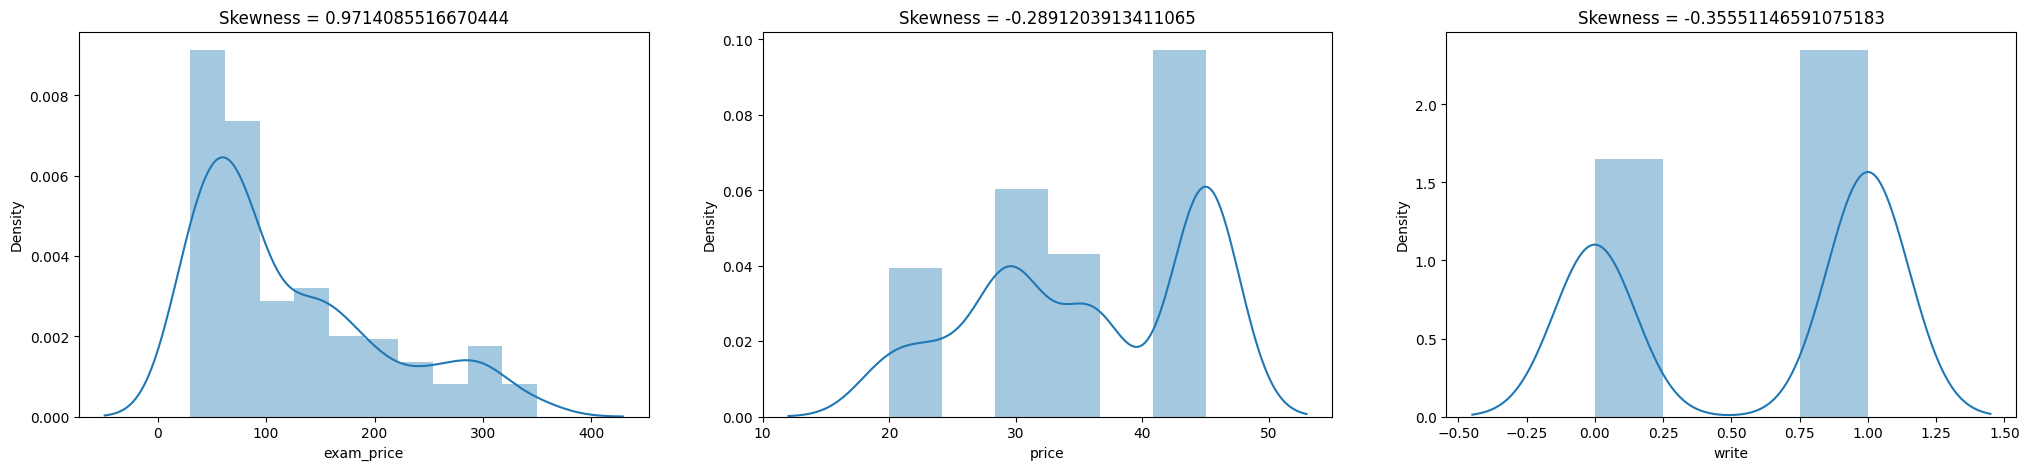

In [26]:
plt.figure(figsize=[25,5])
for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    column = data[data_numerical.columns[i]]
    sb.distplot(column)
    plt.title(f"Skewness = {column.skew()}")

#### The skewness is small enough to be accepted

### Step 2: Normalization (Using MinMaxScaler for numerical data only)

First: Convert 'dr_class' column to numerical column by assigning class 'a' to 1 and class 'b' to 0

In [27]:
data['dr_class'] = data['dr_class'].map({'b': 0, 'a': 1})
data.head()

,area,speciality,dr_class,exam_price,clinic_hos,medicine,price,write
0,area1,chest,1,200,clinic,type1,45,1
1,area2,im,0,100,clinic,type4,36,1
2,area8,chest,1,75,hospital,type1,45,1
3,area5,chest,1,30,hospital,type1,45,1
4,area6,uro,1,220,clinic,type5,29,0


In [28]:
data_numerical.drop('write',axis=1,inplace=True)
data_numerical.head()

,exam_price,price
0,200,45
1,100,36
2,75,45
3,30,45
4,220,29


In [29]:
# Normalize the numerical data only in the DataFrame
from sklearn.preprocessing import MinMaxScaler      #range from 0 to 1
normalizer = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_numerical.columns] = normalizer.fit_transform(data_normalized[data_numerical.columns])
data_normalized.head()

,area,speciality,dr_class,exam_price,clinic_hos,medicine,price,write
0,area1,chest,1,0.531250,clinic,type1,1.00,1
1,area2,im,0,0.218750,clinic,type4,0.64,1
2,area8,chest,1,0.140625,hospital,type1,1.00,1
3,area5,chest,1,0.000000,hospital,type1,1.00,1
4,area6,uro,1,0.593750,clinic,type5,0.36,0


# Step 3: Get correlation between each numerical column and 'write' column

In [30]:
data_normalized['write'] = data['write']
data_numerical = data_normalized.select_dtypes(include= ['float64', 'int64']).copy()
data_numerical.head()

,dr_class,exam_price,price,write
0,1,0.531250,1.00,1
1,0,0.218750,0.64,1
2,1,0.140625,1.00,1
3,1,0.000000,1.00,1
4,1,0.593750,0.36,0


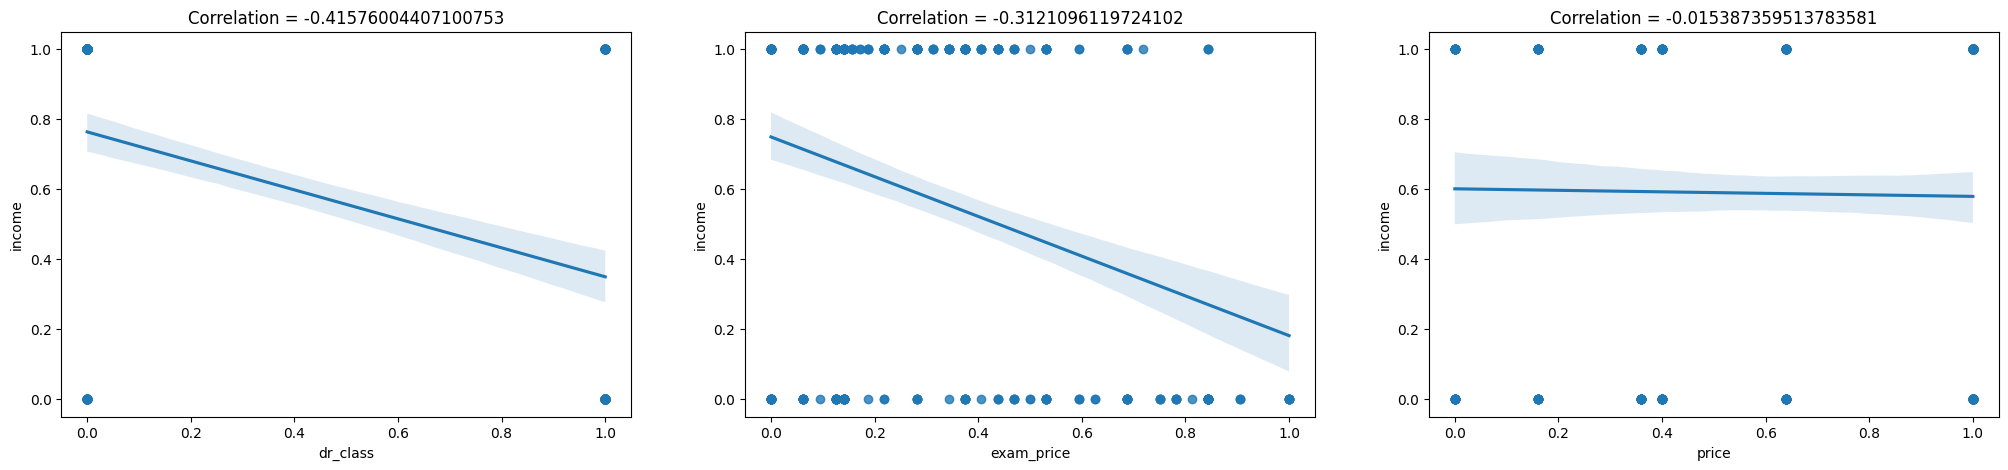

In [31]:
# Show correlation and outliers first by data visualization
plt.figure(figsize = [25, 5])

# Calculate the correlation for each column with "income" column
corr = data_normalized.corr(numeric_only = True)['write']
for i in range(0, len(data_numerical.columns)-1):     # range 0 to 6
    plt.subplot(1, len(data_numerical.columns)-1, 1+i)
    sb.regplot(data = data_normalized[data_numerical.columns], x = data_numerical.columns[i], y = 'write');
    plt.xlabel(data_numerical.columns[i])
    plt.ylabel('income')
    plt.title(f"Correlation = {corr[i]}")

### The correlation between 'dr_class', 'exam_price', 'medicine_price' and 'wite' column are low 

# Step 4: Convert Categorical Data into Numerical using One-Hot Encoding from sklearn Library

### First: Get Categorical Data

In [32]:
catg_col = data_normalized.drop(data_numerical.columns, axis=1).columns
catg_col

Index(['area', 'speciality', 'clinic_hos', 'medicine'], dtype='object')

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
features_cat = encoder.fit_transform(data_normalized[catg_col])
features_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [34]:
encoder.get_feature_names_out(catg_col)

array(['area_area1', 'area_area2', 'area_area3', 'area_area4',
       'area_area5', 'area_area6', 'area_area7', 'area_area8',
       'speciality_cd', 'speciality_chest', 'speciality_ent',
       'speciality_git', 'speciality_gp', 'speciality_im',
       'speciality_neuro', 'speciality_or', 'speciality_sur',
       'speciality_uro', 'speciality_vas', 'clinic_hos_clinic',
       'clinic_hos_hospital', 'medicine_type1', 'medicine_type2',
       'medicine_type3', 'medicine_type4', 'medicine_type5',
       'medicine_type6'], dtype=object)

In [35]:
encoded_features_df = pd.DataFrame(features_cat, columns=encoder.get_feature_names_out(catg_col), index=data_normalized.index)
encoded_features_df.head()

,area_area1,area_area2,area_area3,area_area4,area_area5,area_area6,area_area7,area_area8,speciality_cd,speciality_chest,...,speciality_uro,speciality_vas,clinic_hos_clinic,clinic_hos_hospital,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
data_normalized[data_numerical.columns].head()

,dr_class,exam_price,price,write
0,1,0.531250,1.00,1
1,0,0.218750,0.64,1
2,1,0.140625,1.00,1
3,1,0.000000,1.00,1
4,1,0.593750,0.36,0


In [37]:
data_processed = pd.concat([data_normalized[data_numerical.columns], encoded_features_df], axis=1)
data_processed.head()

,dr_class,exam_price,price,write,area_area1,area_area2,area_area3,area_area4,area_area5,area_area6,...,speciality_uro,speciality_vas,clinic_hos_clinic,clinic_hos_hospital,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6
0,1,0.531250,1.00,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0.218750,0.64,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.140625,1.00,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.000000,1.00,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0.593750,0.36,0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Sixth Stage: Model Selection

### Split the data into features and target data

In [38]:
write = data_processed["write"].copy()
features = data_processed.drop('write', axis=1)
features.head()

,dr_class,exam_price,price,area_area1,area_area2,area_area3,area_area4,area_area5,area_area6,area_area7,...,speciality_uro,speciality_vas,clinic_hos_clinic,clinic_hos_hospital,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6
0,1,0.531250,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0.218750,0.64,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.140625,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.000000,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0.593750,0.36,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
from sklearn.metrics import fbeta_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric choosen.
    """
    # Calculate the fbeta_score between 'y_true' and 'y_predict'
    score = fbeta_score(y_true, y_predict, beta=0.5)
    # Return the score
    return score

**We used fbeta_score with beta=0.5 because we are concerned with 'precision' more than 'recall'**

In [40]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets (training = 80%, testing = test_size = 20%)
X_train, X_test, y_train, y_test = train_test_split(features, write, test_size=0.2, random_state=0)
print("Training and testing split was successful.")

Training and testing split was successful.


In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier


# Function to build, train, and evaluate the models
def model_building(model_name):
    model = model_name
    model.fit(X_train, y_train)
    print(f"******** Model :- {model_name.__class__.__name__} ********")

    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training F1 Score: {train_f1:.4f}, Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing F1 Score: {test_f1:.4f}, Testing Accuracy: {test_accuracy:.4f}")
    print()

# Dictionary with different models
model_dict = {
    'dt': DecisionTreeClassifier(random_state=0, class_weight='balanced'),
    'knn': KNeighborsClassifier(),
    'rf': RandomForestClassifier(criterion='entropy' , random_state=0, class_weight='balanced'),
    'xgb': xgb.XGBClassifier(random_state=0, class_weight='balanced'),
    'ada': AdaBoostClassifier(random_state=0),
    'svm': SVC(random_state=0,class_weight='balanced')
}

# Calling to build and evaluate models
for key in model_dict.keys():
    model_building(model_dict[key])
    


******** Model :- DecisionTreeClassifier ********
Training F1 Score: 0.9150, Training Accuracy: 0.9071
Testing F1 Score: 0.8200, Testing Accuracy: 0.7692

******** Model :- KNeighborsClassifier ********


  File "c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Training F1 Score: 0.7675, Training Accuracy: 0.7340
Testing F1 Score: 0.7879, Testing Accuracy: 0.7308

******** Model :- RandomForestClassifier ********
Training F1 Score: 0.9183, Training Accuracy: 0.9071
Testing F1 Score: 0.8411, Testing Accuracy: 0.7821

******** Model :- XGBClassifier ********
Training F1 Score: 0.8994, Training Accuracy: 0.8846
Testing F1 Score: 0.8350, Testing Accuracy: 0.7821

******** Model :- AdaBoostClassifier ********
Training F1 Score: 0.8065, Training Accuracy: 0.7692
Testing F1 Score: 0.8544, Testing Accuracy: 0.8077

******** Model :- SVC ********
Training F1 Score: 0.7560, Training Accuracy: 0.7372
Testing F1 Score: 0.8600, Testing Accuracy: 0.8205



### We will choose **"AdaBoost Classifier"** model for its high efficiency and speed.

In [42]:
clf = AdaBoostClassifier(random_state=0)
# Create the parameters list we wish to tune.
# parameters = {'learning_rate':[0.2,0.4,0.6,0.8], 'n_estimators':[30, 40, 50, 60],'base_estimator':[DecisionTreeClassifier(random_state=0)],'base_estimator__max_depth':[3,4,5,7],'base_estimator__min_samples_leaf':[4,5,6,8],'base_estimator__min_samples_split':[2,3]}
parameters = {'learning_rate':[0.4], 'n_estimators':[85], 'estimator':[DecisionTreeClassifier(random_state=0)],'estimator__max_depth':[4],'estimator__min_samples_leaf':[14],'estimator__min_samples_split':[8]}
# Initialize the classifier
cv_sets = ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None)
# Make an fbeta_score scoring object.
scorer = make_scorer(fbeta_score, beta=0.5)
# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)
# Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)
# Get the estimator.
model = grid_fit.best_estimator_
# Fit the new model.
model.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    min_samples_leaf=14,
                                                    min_samples_split=8,
                                                    random_state=0),
                   learning_rate=0.4, n_estimators=85, random_state=0)

In [43]:
# Make predictions using the new model.
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [44]:
# Calculate the accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print('The training accuracy is:', train_accuracy)
print('The test accuracy is:', test_accuracy)
print('The training fbeta Score is:', performance_metric(y_train, train_predictions))
print('The testing fbeta Score is:', performance_metric(y_test, test_predictions))
print('The training f1 Score is:', f1_score(y_train, train_predictions))
print('The testing f1 Score is:', f1_score(y_test, test_predictions))

The training accuracy is: 0.8557692307692307
The test accuracy is: 0.8461538461538461
The training fbeta Score is: 0.8717660292463442
The testing fbeta Score is: 0.8928571428571429
The training f1 Score is: 0.8732394366197183
The testing f1 Score is: 0.8823529411764706


# Save the model

In [51]:
import pickle
pickle.dump(normalizer, open("scaler.pkl", "wb"))
pickle.dump(model, open('medical_representative.pkl', 'wb'))

## Make a prediction function

In [47]:
def prediction_fun(row, model, normalizer, encoder):
    row['write'] = 1
    data_numerical = row.select_dtypes(include=['float64', 'int64']).copy()
    row['dr_class'] = row['dr_class'].map({'b': 0, 'a': 1})

    # Apply normalization
    row[data_numerical.columns] = normalizer.transform(row[data_numerical.columns])
    row.drop('write', axis=1, inplace=True)
    data_numerical = row.select_dtypes(include=['float64', 'int64']).copy()

    # Apply one-hot encoding
    catg_col = row.drop(data_numerical.columns, axis=1).columns
    features_cat = encoder.transform(row[catg_col])
    encoded_features_df = pd.DataFrame(features_cat, columns=encoder.get_feature_names_out(catg_col), index=row.index)
    row_processed = pd.concat([row[data_numerical.columns], encoded_features_df], axis=1)
    
    # Predict the output
    prediction = model.predict(row_processed)
    return prediction

In [48]:
data = pd.concat([doctor_table, medicine_table], axis=1, ignore_index=False)
write_col = data.pop('write')
data.drop(['id_dr', 'id_m'], axis=1, inplace=True)
data['write'] = write_col

In [49]:
index = 45
input_row = data.loc[[index], :]
print(input_row)
input_row = input_row.drop('write', axis=1)
input_row

     area speciality dr_class  exam_price clinic_hos medicine  price  write
45  area2        sur        b         120     clinic    type4     36      1


,area,speciality,dr_class,exam_price,clinic_hos,medicine,price
45,area2,sur,b,120,clinic,type4,36


In [50]:
print(prediction_fun(row=input_row, model=model, normalizer=normalizer, encoder=encoder))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- write
